# Vectors with Python
First, NumPy and Matplotlib need to be imported. Matplotlib needs to be made inline for the notebook, and seaborn needs to be imported to make the plots look prettier.

Note that the 3D toolkit of Matplotlib is being imported.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import numpy.linalg as la

Next, the style is set to white-grid (personal preference), and the context is set to talk to make viewing the charts easier (bigger numbers and plots).

In [2]:
sns.set(style='whitegrid', palette='muted', font='roboto')
sns.set_context('talk')

Now the vectors to be visualized need to be created. They will be stored as NumPy _ndarray_ objects. Some 2D and 3D (or R<sup>2</sup> and R<sup>3</sup> - 2 and 3 dimensional real space, or the set of all possible 2 and 3 real-valued tuples) will be used.

A couple vectors from R<sup>1</sup> will also be created for the simplest case.

In [3]:
u,v = np.array([6,0]), np.array([3,1])
u3,v3 = np.array([6,0,4]), np.array([3,5,6])
u1,v1 = np.array([6]), np.array([3])

## Visualizing Vectors
The two functions below are only used for vector plots in R<sup>1</sup>. The results of the plots in R<sup>1</sup> are shown in the following cell.

In [4]:
def plot_1d_vector(vector, origin=0, **kwargs):
    if len(vector) == 0: return
    v = vector[0]
    return plt.arrow(origin, 0, vector[0], 0,
                     length_includes_head=True,
                     width=0.1, **kwargs)

def get_1d_axis(*vectors):
    min_x = min(min(vectors), 0) - 2
    max_x = max(max(vectors), 0) + 2
    plt.plot([min_x,max_x], [0,0], color='0.8')
    return plt.axis([min_x, max_x,
                     -1, 1])

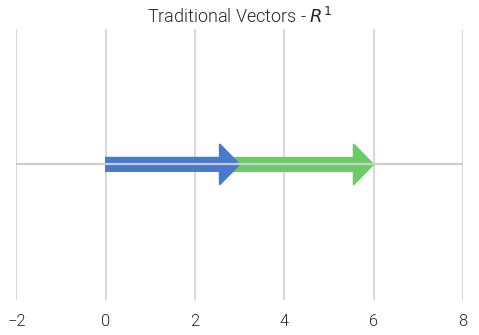

In [5]:
figure = plt.figure(figsize=(8,5))
get_1d_axis(u1,v1)
plot_1d_vector(u1, color='g')
plot_1d_vector(v1, color='b')
sns.despine(left=True, bottom=True, right=True, top=True)
plt.gca().yaxis.set_visible(False)
plt.title('Traditional Vectors - $R^1$')
plt.show()

The functions below create the axes for the R<sup>2</sup> and R<sup>3</sup> vector plots. They are really just to ensure the vectors can be seen completely when plotted. The z-axis must be obtained separately for R<sup>3</sup> vector plots.

In [6]:
def get_xy_axes(*vectors):
    """Get appropriate x and y axes for vectors."""
    if len(vectors) == 0:
        return
    if vectors[0].size == 2:
        return get_2d_xy_axes(*vectors)
    elif vectors[0].size == 3:
        return get_3d_xy_axes(*vectors)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        

def get_z_axis(axes, *vectors):
    """Get appropriate z axis for R3 vector."""
    x,y,z = zip(*vectors)
    min_z = min(min(z), 0)
    max_z = max(max(z), 0) + 2
    return axes.set_zlim(min_z, max_z)

        
def get_2d_xy_axes(*vectors):
    x,y = zip(*vectors)
    min_x = min(min(x)-1, 0)
    min_y = min(min(y)-1, 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     min_y, max_y])

def get_3d_xy_axes(*vectors):
    x,y,z = zip(*vectors)
    min_x = min(min(x), 0)
    min_y = min(min(y), 0)
    max_x = max(max(x)+2, 0)
    max_y = max(max(y)+2, 0)
    return plt.axis([min_x, max_x,
                     max_y, min_y])

The functions below actually plot the R<sup>2</sup> and R<sup>3</sup> vectors. They can either be plotted as single points in n-dimensional space or arrow representations in n-dimensional space.

In [7]:
plot_types = ['arrow',
              'scatter']

def plot_vector(vector, origin=[0,0,0], plot_type=plot_types[0],
                axes=None, display_norm=False, **kwargs):
    """Plots vectors in R2 and R3.
    
    Returns plt if plotting in R2.
    Returns Axes3D if plotting in R3.
    
    If plotting multiple vectors in R3,
    pass in the returned axes from the
    first plot for subsequent plots.
    """
    
    if vector.size == 2:
        return plot_2d_vector(vector, origin, plot_type,
                              display_norm, **kwargs)
    elif vector.size == 3:
        return plot_3d_vector(vector, origin, plot_type, axes,
                              display_norm, **kwargs)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        
        
def plot_2d_vector(vector, origin, plot_type,
                   display_norm, **kwargs):
    if plot_type == plot_types[0]:
        plt.arrow(origin[0], origin[1],
                  vector[0], vector[1],
                  length_includes_head=True,
                  head_width=0.2, head_length=0.3,
                  **kwargs)
        if display_norm:
            bbox = dict(boxstyle='round', fc='0.95')
            plt.annotate(f'norm: {la.norm(vector):.2f}',
                         [vector[0]-1, vector[1]+0.5],
                         fontname='roboto',
                         bbox=bbox)
    elif plot_type == plot_types[1]:
        x,y = zip(vector)
        plt.scatter(x, y, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return plt

def plot_3d_vector(vector, origin, plot_type, axes,
                   display_norm, **kwargs):
    if axes == None:
        fig = plt.figure(figsize=(10,7))
        ax3 = fig.add_subplot(111, projection='3d')
    else:
        ax3 = axes
        
    x,y,z = vector
    ox,oy,oz = origin
    ax3.invert_xaxis()
    ax3.plot([ox+x,ox+x], [oy+y,oy+y], [oz,oz+z], linestyle=':')
    ax3.plot([ox+x,ox+x], [oy,oy+y], [oz+z,oz+z], linestyle=':')
    ax3.plot([ox,ox+x], [oy+y,oy+y], [oz+z,oz+z], linestyle=':')
    
    if plot_type == plot_types[0]:
        ax3.quiver(*origin,x,y,z,
                   linewidth=2,
                   **kwargs)
        if display_norm:
            bbox = dict(boxstyle='round', fc='0.95')
            ax3.text(origin[0]+vector[0]-1,
                     origin[1]+vector[1]+0.25,
                     origin[2]+vector[2]+1,
                     f'norm: {la.norm(vector):.2f}',
                     fontname='roboto',
                     bbox=bbox)
    elif plot_type == plot_types[1]:
        ax3.scatter(origin[0]+x,
                    origin[1]+y,
                    origin[2]+z,
                    **kwargs)
    else:
        print('Desired plot not supported.')
        
    return ax3

Now it's time to show the interesting plots. The vectors of R<sup>2</sup> are plotted below.

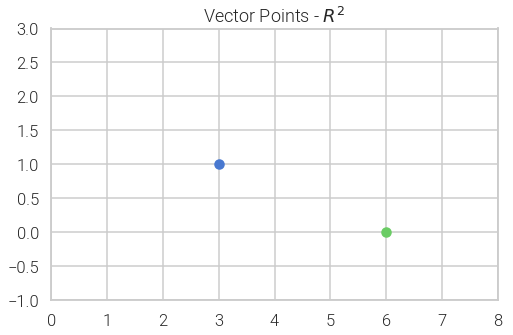

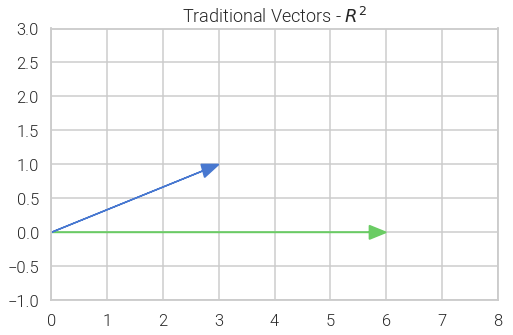

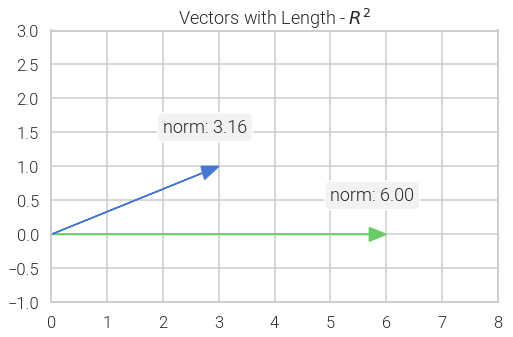

In [8]:
figure = plt.figure(figsize=(8,5))
plt.title('Vector Points - $R^2$')
plot_vector(u, plot_type='scatter', color='g')
plot_vector(v, plot_type='scatter', color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plt.title('Traditional Vectors - $R^2$')
plot_vector(u, color='g')
plot_vector(v, color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plt.title('Vectors with Length - $R^2$')
plot_vector(u, display_norm=True, color='g')
plot_vector(v, display_norm=True, color='b')
get_xy_axes(u,v)

plt.show()

A diagram that proves the norm function from NumPy works (it returns the length of vectors) is shown below.

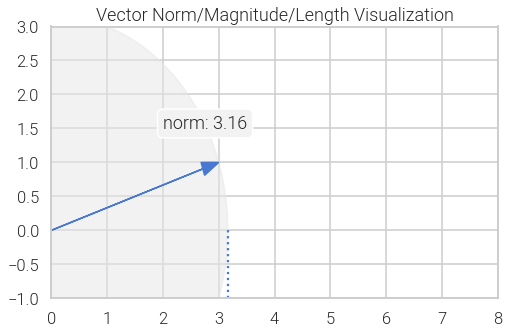

In [9]:
figure = plt.figure(figsize=(8,5))
plt.gca().add_artist(plt.Circle((0,0), la.norm(v), color='0.9', alpha=0.5))
plt.plot(*(zip([la.norm(v),-1],[la.norm(v),0])), ':')
plot_vector(v, display_norm=True, color='b')
get_xy_axes(u,v)

plt.title('Vector Norm/Magnitude/Length Visualization')
plt.show()

The vectors of R<sup>3</sup> are plotted below. The 3D plots use dashed lines to give the illusion of depth.

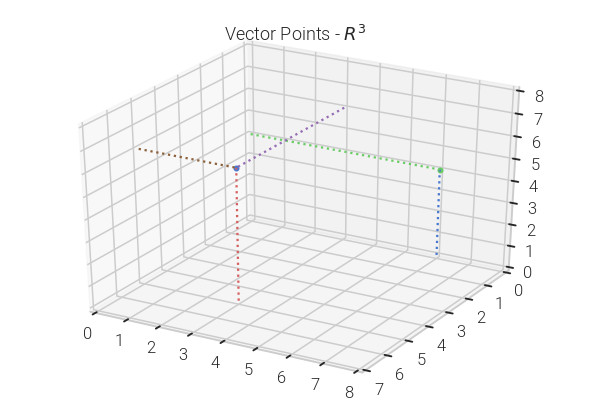

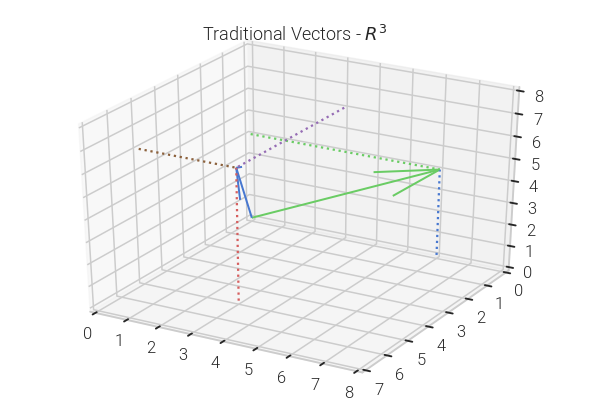

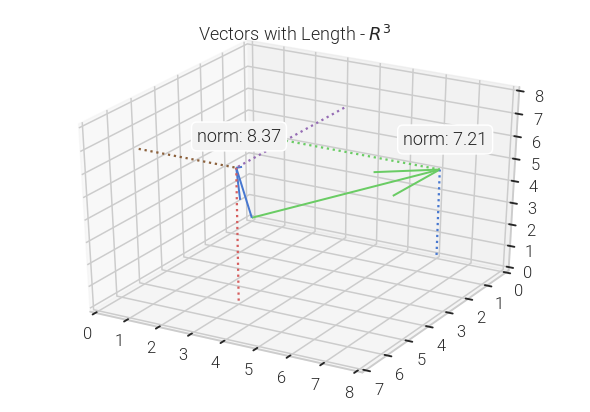

In [10]:
ax3 = plot_vector(u3, plot_type='scatter', color='g')
plot_vector(v3, plot_type='scatter', axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Vector Points - $R^3$')

ax3 = plot_vector(u3, color='g')
plot_vector(v3, axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Traditional Vectors - $R^3$')

ax3 = plot_vector(u3, display_norm=True, color='g')
plot_vector(v3, axes=ax3, display_norm=True, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)
plt.title('Vectors with Length - $R^3$')

plt.show()

## Adding Vectors Visualized
Any vectors belonging to the same set of valued-tuples can be added together. It is achieved by adding each vector component to its corresponding component in the other vectors. As shown below, it is commutative and associative.

In [11]:
w = np.array([3,5])
w3 = np.array([3,5,1])

print('Commutative:')
print(f'{u} + {v} = {u+v}')
print(f'{v} + {u} = {v+u}')

print('\nAssociative:')
print(f'{u} + ({v} + {w}) = {u + (v + w)})')
print(f'({u} + {v}) + {w} = {(u + v) + w})')

print('\nArbitrarily sized:')
large_u, large_v = np.array([3,5,2,6,7,3,9]), np.array([8,5,4,9,7,5,0])
print(f'{large_u} + {large_v} = {large_u + large_v}')

print('\nMust belong to the same set of valued tuples:')
try:
    print(f'{u} + {u3} =')
    u+u3
except Exception as e:
    print(e)

Commutative:
[6 0] + [3 1] = [9 1]
[3 1] + [6 0] = [9 1]

Associative:
[6 0] + ([3 1] + [3 5]) = [12  6])
([6 0] + [3 1]) + [3 5] = [12  6])

Arbitrarily sized:
[3 5 2 6 7 3 9] + [8 5 4 9 7 5 0] = [11 10  6 15 14  8  9]

Must belong to the same set of valued tuples:
[6 0] + [6 0 4] =
operands could not be broadcast together with shapes (2,) (3,) 


The plot below shows what happens when vectors are added together.

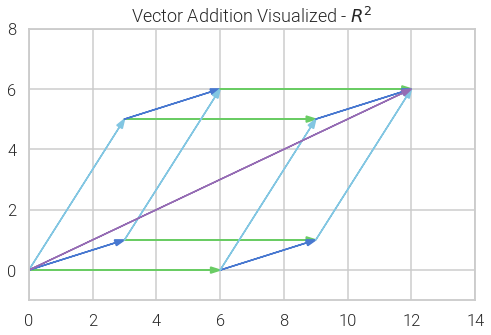

In [12]:
figure = plt.figure(figsize=(8,5))
plot_vector(u, color='g')
plot_vector(v, color='b')
plot_vector(w, color='c')
plot_vector(u, origin=v, color='g')
plot_vector(u, origin=w, color='g')
plot_vector(v, origin=u, color='b')
plot_vector(v, origin=w, color='b')
plot_vector(w, origin=u, color='c')
plot_vector(w, origin=v, color='c')
plot_vector(u, origin=v+w, color='g')
plot_vector(v, origin=u+w, color='b')
plot_vector(w, origin=u+v, color='c')
plot_vector(u+v+w, color='m')
get_xy_axes(u,v,w,u+v+w)
plt.title('Vector Addition Visualized - $R^2$')
plt.show()

As should be expected, it even works in R<sup>3</sup>, as well as all other dimensions.

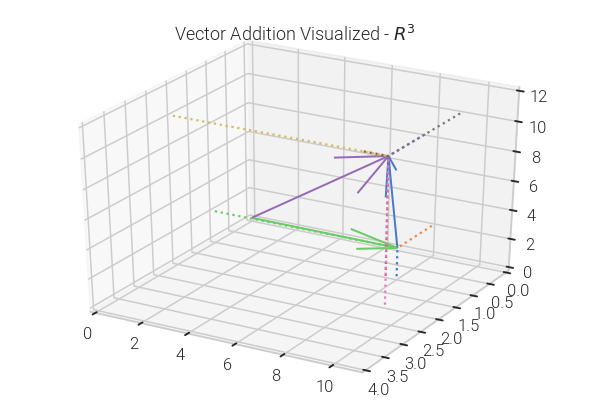

In [13]:
a,b = np.array([8,1,2]), np.array([1,1,8])
c = a + b
ax3 = plot_vector(a, color='g')
plot_vector(b, origin=a, axes=ax3, color='b')
plot_vector(c, axes=ax3, color='m')
get_z_axis(ax3, a, b, c)
get_xy_axes(a,b,c)
plt.title('Vector Addition Visualized - $R^3$')
plt.show()

The plot below further demonstrates that the principles of vector addition demonstrated this far apply to any arbitrary number of vectors

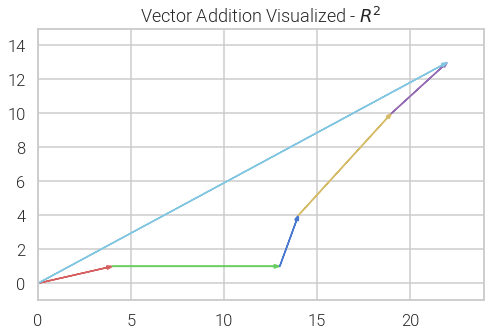

In [14]:
a,b,c,d,e = (np.array([4,1]), np.array([9,0]), np.array([1,3]),
             np.array([5,6]), np.array([3,3]))
f = a + b + c + d + e

figure = plt.figure(figsize=(8,5))
plot_vector(a, color='r')
plot_vector(b, origin=a, color='g')
plot_vector(c, origin=a+b, color='b')
plot_vector(d, origin=a+b+c, color='y')
plot_vector(e, origin=a+b+c+d, color='m')
plot_vector(f, color='c')
get_xy_axes(a,b,c,d,e,f)
plt.title('Vector Addition Visualized - $R^2$')
plt.show()

## Rigid Euclidean Geometric Transformations
In Euclidean geometry, the rigid geometric transformations include Translations, Rotations, Reflections, and Glide Reflections. Because matrices have yet to be introduced, the only geometric transformation that can be shown at this point is the translation.

### Vector Translation
Translations occur when every point in a geometric space are moved the same amount in a single direction. This can be achieved in R<sup>2</sup> by adding a vector to each point in a given geometric space, as shown below.

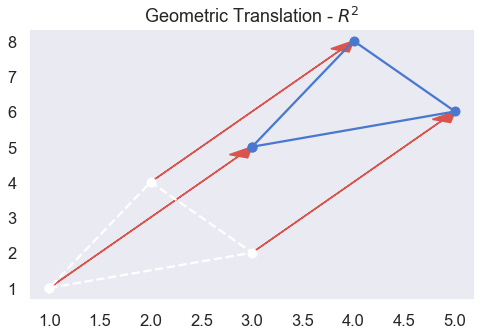

In [15]:
sns.set_style('dark')

a,b,c = np.array([1,1]), np.array([3,2]), np.array([2,4])
v_translation = np.array([2,4])

figure = plt.figure(figsize=(8,5))
plt.plot(*zip(a,b,c,a), 'w--', *zip(a,b,c,a), 'wo')

color = sns.xkcd_rgb['pale red']
plot_vector(v_translation, origin=a, color=color)
plot_vector(v_translation, origin=b, color=color)
plot_vector(v_translation, origin=c, color=color)

ta,tb,tc = (a,b,c)+v_translation
plt.plot(*zip(ta,tb,tc,ta), 'b-', *zip(ta,tb,tc,ta), 'bo')

plt.title('Geometric Translation - $R^2$')
plt.show()

## Zero Vector
Every set of n-valued tuples has a zero vector, which is just a vector of n zeros. NumPy gives a simple function to return a zero vector of any dimension.

In [16]:
np.zeros(2), np.zeros(3), np.zeros(10)

(array([0., 0.]),
 array([0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

## Vector Multiplication
There a many different methods of multiplication when it comes to vectors, including multiplication by scalar, dot product, and cross product.

### Scalar Multiplication
Multiplying a vector belonging to R<sup>n</sup> (n-dimensional space) by a scalar (just a number) results in a scaled-up version of the vector belonging to the same linear span as the original vector. As shown below, it is commutative, associative, and distributive.

In [17]:
scalar = 2
vector = np.array([2,1])

print('Vector of any size:')
n_vector = np.array([3,2,5,6,7,1,2,9,0,0,2])
print(f'{scalar} * {n_vector} = {scalar * n_vector}')

print('\nCommutative:')
print(f'{scalar} * {vector} = {scalar * vector}')
print(f'{vector} * {scalar} = {vector * scalar}')

print('\nAssociative:')
print(f'{scalar} * ({scalar} * {vector}) = {scalar * (scalar * vector)}')
print(f'({scalar} * {scalar}) * {vector} = {(scalar * scalar) * vector}')

print('\nDistributive:')
print(f'{scalar} * ({u3} + {v3}) = {scalar * (u3 + v3)}')
print(f'({scalar} * {u3}) + ({scalar} * {v3}) = {(scalar * u3) + (scalar * v3)}')

Vector of any size:
2 * [3 2 5 6 7 1 2 9 0 0 2] = [ 6  4 10 12 14  2  4 18  0  0  4]

Commutative:
2 * [2 1] = [4 2]
[2 1] * 2 = [4 2]

Associative:
2 * (2 * [2 1]) = [8 4]
(2 * 2) * [2 1] = [8 4]

Distributive:
2 * ([6 0 4] + [3 5 6]) = [18 10 20]
(2 * [6 0 4]) + (2 * [3 5 6]) = [18 10 20]


It is graphically visualized below.

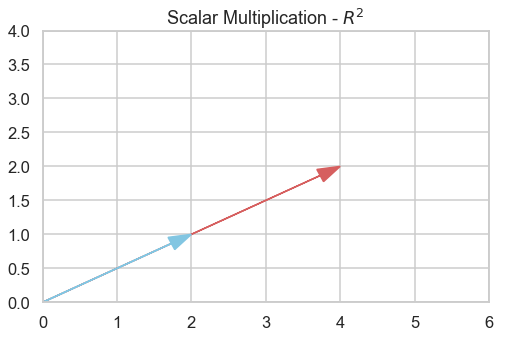

In [18]:
sns.set_style('whitegrid')

figure = plt.figure(figsize=(8,5))
plot_vector(scalar*vector, color='r')
plot_vector(vector, color='c')
get_xy_axes(vector, scalar*vector)
plt.title('Scalar Multiplication - $R^2$')
plt.show()

It can be further visualized by showing that a shape composed of vector points is scaled-up when all vectors are multiplied by the same scalar.

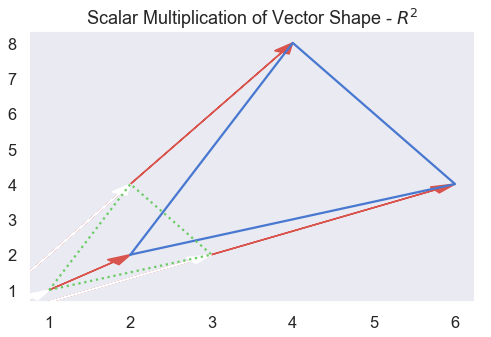

In [19]:
sns.set_style('dark')
figure = plt.figure(figsize=(8,5))

color = sns.xkcd_rgb['pale red']
sa,sb,sc = scalar*a, scalar*b, scalar*c
plt.plot(*zip(sa,sb,sc,sa), 'b-')
plot_vector(sa, color=color)
plot_vector(sb, color=color)
plot_vector(sc, color=color)

plt.plot(*zip(a,b,c,a), 'g:')
plot_vector(a, color='w')
plot_vector(b, color='w')
plot_vector(c, color='w')

plt.title('Scalar Multiplication of Vector Shape - $R^2$')
plt.show()

### The Normalized Vector
Using scalar multiplication, the normalized vector of any vector **v** can be obtained. This is a unit vector (length of 1) that points in the same direction as **v**. Unit vectors and normalized vectors are noted with a hat, so the normalized vector for __v__ would be **$\hat v$**.